In [1]:
import os
from random import shuffle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import tidalUtl.InterfaceSQL as isq
import tidalUtl.PrpUtl as prp
import tidalUtl.EdaUtl as eda
import tidalUtl.VslUtl as vsl
import tidalUtl.ImgUtl as img

# loading some basic packages for testing
from sklearn.linear_model import LogisticRegression
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold
from sklearn.datasets import fetch_openml
#import xgboost as xgb

from tqdm.notebook import tqdm
from skimage import exposure, io
import cv2
from glob import glob
import pickle

import random
from random import randint

In [2]:
# config
INPUT = "/home/tidal/ML_Data/CIFAR10/cifar-10-python/cifar-10-batches-py"
OUTPUT = "/home/tidal/ML_Data/CIFAR10/output"

## Loading

In [3]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
metaData = unpickle(INPUT + '/batches.meta')
batch1 = unpickle(INPUT + '/data_batch_1')
batch2 = unpickle(INPUT + '/data_batch_2')
batch3 = unpickle(INPUT + '/data_batch_3')
batch4 = unpickle(INPUT + '/data_batch_4')
batch5 = unpickle(INPUT + '/data_batch_5')
testBatch = unpickle(INPUT + '/test_batch')

In [5]:
metaData

{b'num_cases_per_batch': 10000,
 b'label_names': [b'airplane',
  b'automobile',
  b'bird',
  b'cat',
  b'deer',
  b'dog',
  b'frog',
  b'horse',
  b'ship',
  b'truck'],
 b'num_vis': 3072}

In [6]:
print(len(batch1[b'data']))
print(len(batch2[b'data']))
print(len(batch3[b'data']))
print(len(batch4[b'data']))
print(len(batch5[b'data']))
print(len(testBatch[b'data']))

10000
10000
10000
10000
10000
10000


In [7]:
print(len(batch1[b'labels']))
print(len(batch2[b'labels']))
print(len(batch3[b'labels']))
print(len(batch4[b'labels']))
print(len(batch5[b'labels']))
print(len(testBatch[b'labels']))

10000
10000
10000
10000
10000
10000


In [8]:
#trainは分割されていたのを一つに結合(この時点ではまだseries)
trainFeature = np.concatenate([batch1[b'data'], 
                               batch2[b'data'],
                               batch3[b'data'],
                               batch4[b'data'],
                               batch5[b'data'],])
testFeature = testBatch[b'data']

In [9]:
#画像用の形にreshape
trainFeature = trainFeature.reshape(50000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
testFeature = testFeature.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

In [10]:
print(trainFeature.shape)
print(testFeature.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


In [13]:
trainTarget = np.concatenate([batch1[b'labels'], 
                               batch2[b'labels'],
                               batch3[b'labels'],
                               batch4[b'labels'],
                               batch5[b'labels'],])
testTarget = np.array(testBatch[b'labels'])

In [14]:
print(trainTarget.shape)
print(testTarget.shape)

(50000,)
(10000,)


# Image

### equalize_hist

画像のピクセルの強さのヒストグラムを正規分布に近づける。（コントラストが出て見やすくなる）


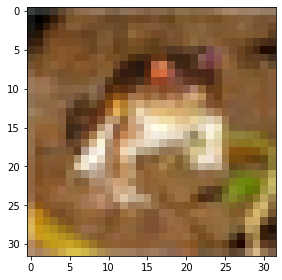

In [16]:
io.imshow(trainFeature[0])

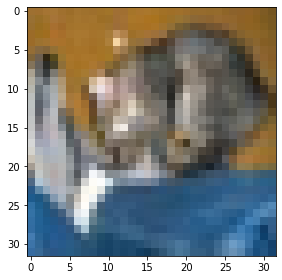

In [17]:
io.imshow(testFeature[0])

/home/tidal/anaconda3/envs/work/lib/python3.7/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


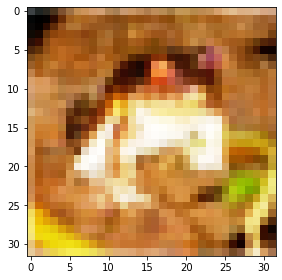

In [73]:
io.imshow(exposure.equalize_hist(trainFeature[0]))

/home/tidal/anaconda3/envs/work/lib/python3.7/site-packages/skimage/exposure/exposure.py:181: UserWarning: This might be a color image. The histogram will be computed on the flattened image. You can instead apply this function to each color channel.
  hist, bin_centers = histogram(image, nbins)


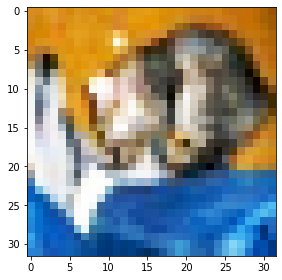

In [18]:
io.imshow(exposure.equalize_hist(testFeature[0]))

# LABEL

In [19]:
u, counts = np.unique(trainTarget, return_counts=True)
print(u)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[5000 5000 5000 5000 5000 5000 5000 5000 5000 5000]


In [20]:
u, counts = np.unique(testTarget, return_counts=True)
print(u)
print(counts)

[0 1 2 3 4 5 6 7 8 9]
[1000 1000 1000 1000 1000 1000 1000 1000 1000 1000]
